<a href="https://colab.research.google.com/github/patel-ashutosh/Intermediate-Python-for-Data-Science/blob/master/Intermediate_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Course Description
Learning Python is crucial for any aspiring data science practitioner. Learn to visualize real data with Matplotlib's functions and get acquainted with data structures such as the dictionary and the pandas DataFrame. After covering key concepts such as boolean logic, control flow, and loops in Python, you'll be ready to blend together everything you've learned to solve a case study using hacker statistics.
#### Credits
1. Hugo Bowne-Anderson (https://www.datacamp.com/community/podcast)
2. Filip Schouwenaars
3. Vincent Vankrunkelsven
4. Patrick Varilly
5. Florian Goossens

## Module 1. Matplotlib
Data visualization is a key skill for aspiring data scientists. Matplotlib makes it easy to create meaningful and insightful plots. In this chapter, you’ll learn how to build various types of plots, and customize them to be more visually appealing and interpretable.
### Data visualization
Very important in Data Analysis
  * Explore data
  * Report insights

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# import dataset
from google.colab import files
uploaded = files.upload()

Saving gapminder.csv to gapminder.csv


In [0]:
gapminder = pd.read_csv("gapminder.csv")
gapminder.head()

,country,continent,year,lifeExp,population,gdpPerCap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


### Line Plot
#### Year Vs Population

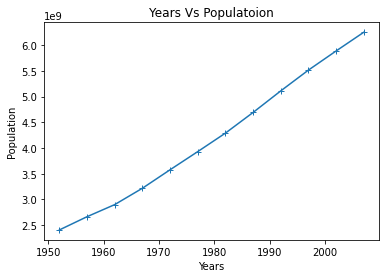

In [0]:
# Prepare data
year_population = gapminder.groupby('year')['population'].sum().reset_index()
year = year_population["year"].values
pop = year_population["population"].values

plt.plot(year, pop, marker = '+')
plt.xlabel("Years")
plt.ylabel("Population")
plt.title("Years Vs Populatoion")
plt.show()

Over the span of 50 years the world population has been tripled.

Now that you've built your first line plot, let's start working on the data that professor Hans Rosling used to build his beautiful bubble chart. It was collected in 2007. Two lists are available for you:

* life_exp which contains the life expectancy for each country and
* gdp_cap, which contains the GDP per capita (i.e. per person) for each country expressed in US Dollars.


GDP stands for Gross Domestic Product. It basically represents the size of the economy of a country. Divide this by the population and you get the GDP per capita.

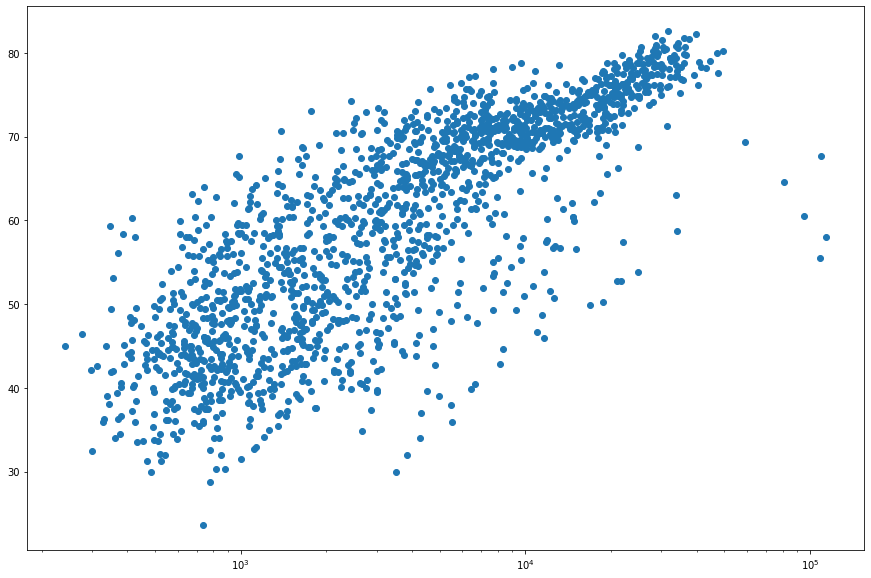

In [0]:
# prepare data
gdp_cap = gapminder["gdpPerCap"].values
life_exp = gapminder["lifeExp"].values

# Change the line plot below to a scatter plot
plt.figure(figsize = (15, 10))
plt.scatter(gdp_cap, life_exp)

# Put the x-axis on a logarithmic scale
plt.xscale('log')

# Show plot
plt.show()

### Histogram
  * Explore dataset
  * Get idea about distribution

#### Selecting appropriate number of bins
* Too few bins will oversimplify reality and won't show you the details. 
* Too many bins will overcomplicate reality and won't show the bigger picture.

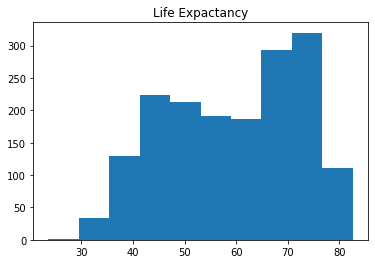

In [0]:
# Create histogram of life_exp data
plt.hist(life_exp)
plt.title("Life Expactancy")

# Display histogram
plt.show()

Majority of countries have life expactancy between 60 to 80 years

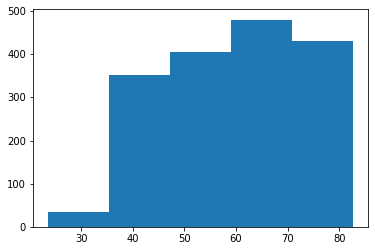

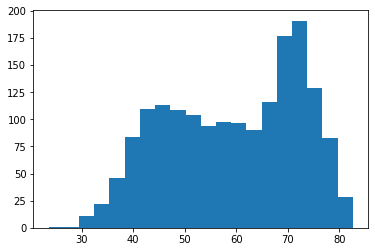

<Figure size 432x288 with 0 Axes>

In [0]:
# Build histogram with 5 bins
plt.hist(life_exp, bins = 5)

# Show and clean up plot
plt.show()
plt.clf()

# Build histogram with 20 bins
plt.hist(life_exp, bins = 20)

# Show and clean up again
plt.show()
plt.clf()

plt.show()

#### Compare the distribution of life_exp of 2007 and 1950

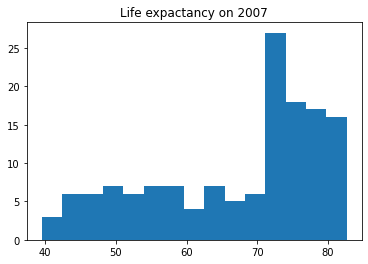

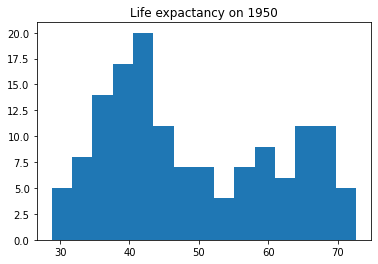

<Figure size 432x288 with 0 Axes>

In [0]:
# prepare data
life_exp_2007 = gapminder[gapminder["year"] == 2007]["lifeExp"]
life_exp_1952 = gapminder[gapminder["year"] == 1952]["lifeExp"]

# Histogram of life_exp, 15 bins
plt.hist(life_exp_2007, bins = 15)
plt.title("Life expactancy on 2007")

# Show and clear plot
plt.show()
plt.clf()

# Histogram of life_exp1950, 15 bins
plt.hist(life_exp_1952, bins = 15)
plt.title("Life expactancy on 1950")

# Show and clear plot again
plt.show()
plt.clf()

We can clearly see how to average life expactancy which used to around 45 years back in 1950 has shited to 60 years in 2007

### Customization

In [0]:
from google.colab import files
uploaded = files.upload()

Saving gap.csv.txt to gap.csv.txt


In [0]:
gap = pd.read_csv("gap.csv.txt")

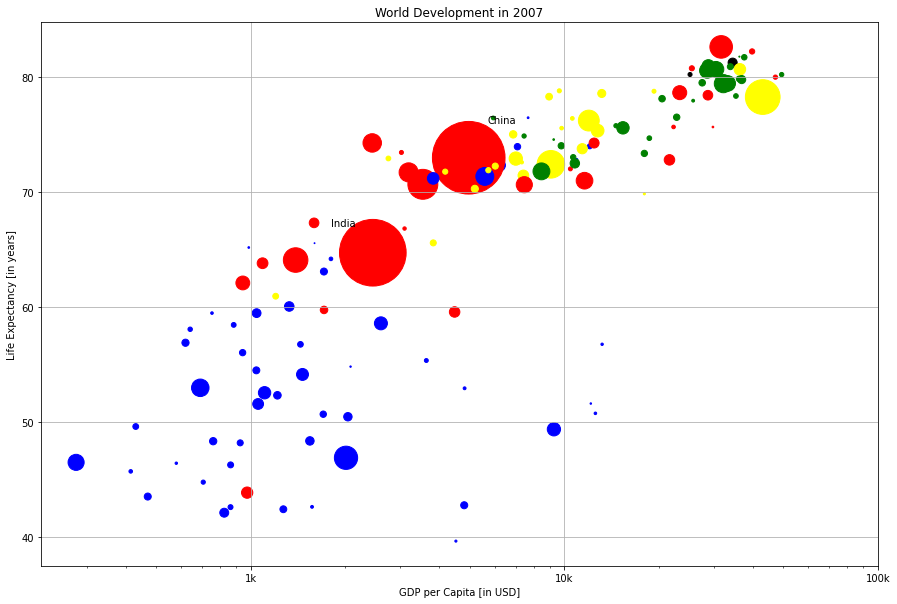

In [0]:
np_pop = gap["population"].values
np_pop = (np_pop * 2)/500000

gap["color"] = gap["cont"]
color_dict = {
    'Asia':'red',
    'Europe':'green',
    'Africa':'blue',
    'Americas':'yellow',
    'Oceania':'black'
}
gap["color"] = gap["color"].replace(color_dict)
col = gap["color"].tolist()

# Basic scatter plot, log scale
plt.figure(figsize = (15, 10))
plt.scatter(gap["gdp_cap"], gap["life_exp"], s = np_pop, c = col)
plt.xscale('log') 

# Strings
xlab = 'GDP per Capita [in USD]'
ylab = 'Life Expectancy [in years]'
title = 'World Development in 2007'

# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)


# Add title
plt.title('World Development in 2007')

# Definition of tick_val and tick_lab
tick_val = [1000, 10000, 100000]
tick_lab = ['1k', '10k', '100k']

# Adapt the ticks on the x-axis
plt.xticks(tick_val, tick_lab)

# Additional customizations
plt.text(1800, 67, 'India')
plt.text(5700, 76, 'China')

# Add grid() call
plt.grid(True)


# Show the plot
plt.show()

# After customizing, display the plot
plt.show()

### Interpretation
If you have a look at your colorful plot, it's clear that people live longer in countries with a higher GDP per capita. No high income countries have really short life expectancy, and no low income countries have very long life expectancy. Still, there is a huge difference in life expectancy between countries on the same income level. Most people live in middle income countries where difference in lifespan is huge between countries; depending on how income is distributed and how it is used.

## Module 2. Dictionaries & Pandas
Learn about the dictionary, an alternative to the Python list, and the pandas DataFrame, the de facto standard to work with tabular data in Python. You will get hands-on practice with creating and manipulating datasets, and you’ll learn how to access the information you need from these data structures.
### Dictionaries, Part 1
#### Motivation for dictionaries
To see why dictionaries are useful, have a look at the two lists defined on the right. countries contains the names of some European countries. capitals lists the corresponding names of their capital.

In [0]:
# Definition of countries and capital
countries = ['spain', 'france', 'germany', 'norway']
capitals = ['madrid', 'paris', 'berlin', 'oslo']

# Get index of 'germany': ind_ger
ind_ger = countries.index("germany")

# Use ind_ger to print out capital of Germany
print(capitals[ind_ger])

berlin


this works, but it's not very convenient. Head over to the next exercise to create a dictionary of this data.
#### Create dictionary
The countries and capitals lists are again available in the script. It's your job to convert this data to a dictionary where the country names are the keys and the capitals are the corresponding values.

In [0]:
# Definition of countries and capital
countries = ['spain', 'france', 'germany', 'norway']
capitals = ['madrid', 'paris', 'berlin', 'oslo']

# From string in countries and capitals, create dictionary europe
europe = { 'spain':'madrid', 'france': 'paris', "germany": 'berlin', 'norway': 'oslo' }

# Print europe
print(europe)

{'spain': 'madrid', 'france': 'paris', 'germany': 'berlin', 'norway': 'oslo'}


#### Access dictionary

In [0]:
# Definition of dictionary
europe = {'spain':'madrid', 'france':'paris', 'germany':'berlin', 'norway':'oslo' }

# Print out the keys in europe
print(europe.keys())

# Print out value that belongs to key 'norway'
print(europe["norway"])

dict_keys(['spain', 'france', 'germany', 'norway'])
oslo


##### Dictionary Manipulation (1)

In [0]:
# Definition of dictionary
europe = {'spain':'madrid', 'france':'paris', 'germany':'berlin', 'norway':'oslo' }

# Add italy to europe
europe["italy"] = "rome"

# Print out italy in europe
print("italy" in europe)


# Add poland to europe
europe["poland"] = "warsaw"

# Print europe
print(europe)


True
{'spain': 'madrid', 'france': 'paris', 'germany': 'berlin', 'norway': 'oslo', 'italy': 'rome', 'poland': 'warsaw'}


 Europe is growing by the minute! Did you notice that the order of the printout is not the same as the order in the dictionary's definition? That's because dictionaries are inherently unordered.

##### Dictionary Manipulation (2)

In [0]:
# Definition of dictionary
europe = {'spain':'madrid', 'france':'paris', 'germany':'bonn',
          'norway':'oslo', 'italy':'rome', 'poland':'warsaw',
          'australia':'vienna' }

# Update capital of germany
europe["germany"] = "berlin"

# Remove australia
del(europe["australia"])

# Print europe
print(europe)

{'spain': 'madrid', 'france': 'paris', 'germany': 'berlin', 'norway': 'oslo', 'italy': 'rome', 'poland': 'warsaw'}


#### Dictionariception
Remember lists? They could contain anything, even other lists. Well, for dictionaries the same holds. Dictionaries can contain key:value pairs where the values are again dictionaries.

As an example, have a look at the script where another version of europe - the dictionary you've been working with all along - is coded. The keys are still the country names, but the values are dictionaries that contain more information than just the capital.

In [0]:
# Dictionary of dictionaries
europe = { 'spain': { 'capital':'madrid', 'population':46.77 },
           'france': { 'capital':'paris', 'population':66.03 },
           'germany': { 'capital':'berlin', 'population':80.62 },
           'norway': { 'capital':'oslo', 'population':5.084 } }


# Print out the capital of France
print(europe["france"]["capital"])

# Create sub-dictionary data
data = {"capital": "rome", "population": 59.83}

# Add data to europe under key 'italy'
europe["italy"] = data

# Print europe
print(europe)

paris
{'spain': {'capital': 'madrid', 'population': 46.77}, 'france': {'capital': 'paris', 'population': 66.03}, 'germany': {'capital': 'berlin', 'population': 80.62}, 'norway': {'capital': 'oslo', 'population': 5.084}, 'italy': {'capital': 'rome', 'population': 59.83}}


### Dictionary to DataFrame (1)
Pandas is an open source library, providing high-performance, easy-to-use data structures and data analysis tools for Python. Sounds promising!

The DataFrame is one of Pandas' most important data structures. It's basically a way to store tabular data where you can label the rows and the columns. One way to build a DataFrame is from a dictionary.

In the exercises that follow you will be working with vehicle data from different countries. Each observation corresponds to a country and the columns give information about the number of vehicles per capita, whether people drive left or right, and so on.

Three lists are defined in the script:

names, containing the country names for which data is available.
dr, a list with booleans that tells whether people drive left or right in the corresponding country.
cpc, the number of motor vehicles per 1000 people in the corresponding country.
Each dictionary key is a column label and each value is a list which contains the column elements.

In [0]:
# Pre-defined lists
names = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt']
dr =  [True, False, False, False, True, True, True]
cpc = [809, 731, 588, 18, 200, 70, 45]

# Import pandas as pd
import pandas as pd

# Create dictionary my_dict with three key:value pairs: my_dict
my_dict = {"country": names, "drives_right": dr, "cars_per_cap": cpc}

# Build a DataFrame cars from my_dict: cars
cars = pd.DataFrame(my_dict)

# Print cars
print(cars)

         country  drives_right  cars_per_cap
0  United States          True           809
1      Australia         False           731
2          Japan         False           588
3          India         False            18
4         Russia          True           200
5        Morocco          True            70
6          Egypt          True            45


Notice that the columns of cars can be of different types. This was not possible with 2D Numpy arrays!

#### Dictionary to DataFrame (2)
The Python code that solves the previous exercise is included on the right. Have you noticed that the row labels (i.e. the labels for the different observations) were automatically set to integers from 0 up to 6?

To solve this a list row_labels has been created. You can use it to specify the row labels of the cars DataFrame. You do this by setting the index attribute of cars, that you can access as cars.index.

In [0]:
# Definition of row_labels
row_labels = ['US', 'AUS', 'JPN', 'IN', 'RU', 'MOR', 'EG']

# Specify row labels of cars
cars.index = row_labels

# Print cars again
print(cars)

           country  drives_right  cars_per_cap
US   United States          True           809
AUS      Australia         False           731
JPN          Japan         False           588
IN           India         False            18
RU          Russia          True           200
MOR        Morocco          True            70
EG           Egypt          True            45


#### CSV to DataFrame (1)
Putting data in a dictionary and then building a DataFrame works, but it's not very efficient. What if you're dealing with millions of observations? In those cases, the data is typically available as files with a regular structure. One of those file types is the CSV file, which is short for "comma-separated values".

To import CSV data into Python as a Pandas DataFrame you can use read_csv().

In [10]:
from google.colab import files
uploaded = files.upload()

Saving cars.csv to cars.csv


In [11]:
cars = pd.read_csv("cars.csv.txt")
# Print out cars
print(cars)

NameError: ignored

 Looks nice, but not exactly what we expected. Let's fix this in the next exercise.

#### CSV to DataFrame (2)
Your read_csv() call to import the CSV data didn't generate an error, but the output is not entirely what we wanted. The row labels were imported as another column without a name.

Remember index_col, an argument of read_csv(), that you can use to specify which column in the CSV file should be used as a row label? Well, that's exactly what you need here!

In [0]:
# Import pandas as pd
import pandas as pd

# Fix import by including index_col
cars = pd.read_csv('cars.csv.txt', index_col = 0)

# Print out cars
print(cars)

     cars_per_cap        country  drives_right
US            809  United States          True
AUS           731      Australia         False
JAP           588          Japan         False
IN             18          India         False
RU            200         Russia          True
MOR            70        Morocco          True
EG             45          Egypt          True


### Pandas 2
#### Square Brackets (1)

In [0]:
# Print out country column as Pandas Series
print(cars["country"])

# Print out country column as Pandas DataFrame
print(cars[["country"]])

# Print out DataFrame with country and drives_right columns
print(cars[["country", "drives_right"]])

US     United States
AUS        Australia
JAP            Japan
IN             India
RU            Russia
MOR          Morocco
EG             Egypt
Name: country, dtype: object
           country
US   United States
AUS      Australia
JAP          Japan
IN           India
RU          Russia
MOR        Morocco
EG           Egypt
           country  drives_right
US   United States          True
AUS      Australia         False
JAP          Japan         False
IN           India         False
RU          Russia          True
MOR        Morocco          True
EG           Egypt          True


#### Square Brackets (2)

In [0]:
# Print out first 3 observations
print(cars[:3])

# Print out fourth, fifth and sixth observation
print(cars[3:6])

     cars_per_cap        country  drives_right
US            809  United States          True
AUS           731      Australia         False
JAP           588          Japan         False
     cars_per_cap  country  drives_right
IN             18    India         False
RU            200   Russia          True
MOR            70  Morocco          True


You can get interesting information, but using square brackets to do indexing is rather limited. Experiment with more advanced techniques in the following exercises.
#### loc and iloc (1)
With loc and iloc you can do practically any data selection operation on DataFrames you can think of. loc is label-based, which means that you have to specify rows and columns based on their row and column labels. iloc is integer index based, so you have to specify rows and columns by their integer index like you did in the previous exercise.

In [0]:
# Print out observation for Japan
print(cars.loc["JAP"])

# Print out observations for Australia and Egypt
print(cars.loc[["AUS", "EG"]])


cars_per_cap      588
country         Japan
drives_right    False
Name: JAP, dtype: object
     cars_per_cap    country  drives_right
AUS           731  Australia         False
EG             45      Egypt          True


In [0]:
# Print out drives_right value of Morocco
print(cars.loc[["MOR"], ["drives_right"]])

# Print sub-DataFrame
print(cars.loc[["RU", "MOR"], ["country", "drives_right"]])

     drives_right
MOR          True
     country  drives_right
RU    Russia          True
MOR  Morocco          True


In [0]:
# Print out drives_right column as Series
print(cars.iloc[:, 2])

# Print out drives_right column as DataFrame
print(cars.iloc[:, [2]])

# Print out cars_per_cap and drives_right as DataFrame
print(cars.iloc[: , [0, 2]])

US      True
AUS    False
JAP    False
IN     False
RU      True
MOR     True
EG      True
Name: drives_right, dtype: bool
     drives_right
US           True
AUS         False
JAP         False
IN          False
RU           True
MOR          True
EG           True
     cars_per_cap  drives_right
US            809          True
AUS           731         False
JAP           588         False
IN             18         False
RU            200          True
MOR            70          True
EG             45          True


## Module 2. Logic, Control Flow and Filtering
Boolean logic is the foundation of decision-making in Python programs. Learn about different comparison operators, how to combine them with Boolean operators, and how to use the Boolean outcomes in control structures. You'll also learn to filter data in pandas DataFrames using logic.
### Comparison Operators
Equality
To check if two Python values, or variables, are equal you can use ==. To check for inequality, you need !=. As a refresher, have a look at the following examples that all result in True. Feel free to try them out in the IPython Shell.



In [0]:
print(2 == (1 + 1))
print("intermediate" != "python")
print(True != False)
print("Python" != "python")
print(True == 1)

True
True
True
True
True


The last comparison worked fine because actually, a boolean is a special kind of integer: True corresponds to 1, False corresponds to 0.

In [0]:
# Comparison of integers
x = -3 * 6
print(x >= -10)

# Comparison of strings
y = "test"
print("test" <= y)

# Comparison of booleans
print(True > False)

False
True
True


#### Compare arrays


In [0]:
# Create arrays
import numpy as np
my_house = np.array([18.0, 20.0, 10.75, 9.50])
your_house = np.array([14.0, 24.0, 14.25, 9.0])

# my_house greater than or equal to 18
print(my_house >= 18)

# my_house less than your_house
print(my_house <= your_house)

[ True  True False False]
[False  True  True False]


 It appears that the living room and bedroom in my_house are smaller than the corresponding areas in your_house
 ### Boolean Operators


In [0]:
# Define variables
my_kitchen = 18.0
your_kitchen = 14.0

# my_kitchen bigger than 10 and smaller than 18?
print(my_kitchen > 10 and my_kitchen < 18)

# my_kitchen smaller than 14 or bigger than 17?
print(my_kitchen > 17 or my_kitchen < 14)

# Double my_kitchen smaller than triple your_kitchen?
print((2* my_kitchen < 3 * your_kitchen))

False
True
True


In [0]:
x = 8
y = 9
not(not(x < 3) and not(y > 14 or y > 10))

False

In [0]:
# Create arrays
import numpy as np
my_house = np.array([18.0, 20.0, 10.75, 9.50])
your_house = np.array([14.0, 24.0, 14.25, 9.0])

# my_house greater than 18.5 or smaller than 10
print(np.logical_or(my_house > 18.5, my_house < 10))

# Both my_house and your_house smaller than 11
print(np.logical_and(my_house < 10, your_house < 10))

[False  True False  True]
[False False False  True]


### IF-ELIF-ELSE

In [0]:
# IF 

# Define variables
room = "kit"
area = 14.0

# if statement for room
if room == "kit" :
    print("looking around in the kitchen.")

# if statement for area
if area > 15 :
    print("big place!")

looking around in the kitchen.


In [0]:
# IF - ELSE

# Define variables
room = "kit"
area = 14.0

# if-else construct for room
if room == "kit" :
    print("looking around in the kitchen.")
else :
    print("looking around elsewhere.")

# if-else construct for area
if area > 15 :
    print("big place!")
else:
    print("pretty small.")

looking around in the kitchen.
pretty small.


In [0]:
# IF-ELIF-ELSE

# Define variables
room = "bed"
area = 14.0

# if-elif-else construct for room
if room == "kit" :
    print("looking around in the kitchen.")
elif room == "bed":
    print("looking around in the bedroom.")
else :
    print("looking around elsewhere.")

# if-elif-else construct for area
if area > 15 :
    print("big place!")
elif area > 10:
    print("medium size, nice!")
else :
    print("pretty small.")

looking around in the bedroom.
medium size, nice!


### Filtering Pandas DataFrame

In [0]:
from google.colab import files
uploaded = files.upload()

Saving cars.csv.txt to cars.csv.txt


In [0]:
cars = pd.read_csv("cars.csv.txt", index_col = 0)
cars.head()

,cars_per_cap,country,drives_right
US,809,United States,True
AUS,731,Australia,False
JAP,588,Japan,False
IN,18,India,False
RU,200,Russia,True


In [0]:
# Create medium: observations with cars_per_cap between 100 and 500
cpc = cars["cars_per_cap"]
between = np.logical_and(cpc > 100, cpc < 500)



# Print medium
print(cars[between])

    cars_per_cap country  drives_right
RU           200  Russia          True


## **Module 4. Loops**
There are several techniques you can use to repeatedly execute Python code. While loops are like repeated if statements, the for loop iterates over all kinds of data structures. Learn all about them in this chapter.

### **While**
The while loop is like a repeated if statement. The code is executed over and over again, as long as the condition is True. Have another look at its recipe.

In [1]:
# Can you tell how many printouts the following while loop will do?

x = 1
while x < 4 :
    print(x)
    x = x + 1

1
2
3


After 3 runs, x will be equal to 4, causing x < 4 to evaluate to False. This means that the while loop is executed 3 times, giving three printouts.

#### Basic while loop

In [3]:
# Initialize offset
offset = -6

# Code the while loop
while offset != 0 :
    print("correcting...")
    if offset > 0 :
      offset = offset - 1
    else : 
      offset = offset + 1    
    print(offset)

correcting...
-5
correcting...
-4
correcting...
-3
correcting...
-2
correcting...
-1
correcting...
0


### **For Loop**

In [4]:
# areas list
areas = [11.25, 18.0, 20.0, 10.75, 9.50]

# Code the for loop
for a in areas:
    print(a)

11.25
18.0
20.0
10.75
9.5


##### Indexes and values

In [6]:
# areas list
areas = [11.25, 18.0, 20.0, 10.75, 9.50]

# Code the for loop
for index, area in enumerate(areas) :
    print("room " + str(index + 1) + ": " + str(area))

room 1: 11.25
room 2: 18.0
room 3: 20.0
room 4: 10.75
room 5: 9.5


#### Loop over list of lists

In [7]:
# house list of lists
house = [["hallway", 11.25], 
         ["kitchen", 18.0], 
         ["living room", 20.0], 
         ["bedroom", 10.75], 
         ["bathroom", 9.50]]
         
# Build a for loop from scratch
for i in house:
   print("the " + str(i[0]) + " is " + str(i[1]) + " sqm")

the hallway is 11.25 sqm
the kitchen is 18.0 sqm
the living room is 20.0 sqm
the bedroom is 10.75 sqm
the bathroom is 9.5 sqm


#### Loop Data Structures Part 1


#### Loop over dictionary

In [8]:
# Definition of dictionary
europe = {'spain':'madrid', 'france':'paris', 'germany':'berlin',
          'norway':'oslo', 'italy':'rome', 'poland':'warsaw', 'austria':'vienna' }
          
# Iterate over europe
for k, v in europe.items():
    print("the capital of " + str(k) + " is " + str(v))

the capital of spain is madrid
the capital of france is paris
the capital of germany is berlin
the capital of norway is oslo
the capital of italy is rome
the capital of poland is warsaw
the capital of austria is vienna


Notice that the order of the printouts doesn't necessarily correspond with the order used when defining europe. Remember: dictionaries are inherently unordered!

#### Loop over Numpy array

In [9]:
# Import numpy as np
import numpy as np
np_height = np.array([23,34,46,23,54])
np_baseball = np.array([[23,60], [34,70], [46,80], [23,60], [54,100]])

# For loop over np_height
for i in np_height:
    print(str(i) + " inches")

# For loop over np_baseball
for i in np.nditer(np_baseball):
    print(i)

23 inches
34 inches
46 inches
23 inches
54 inches
23
60
34
70
46
80
23
60
54
100


#### Loop over DataFrame (1)

In [12]:
# Import cars data
import pandas as pd
cars = pd.read_csv('cars.csv', index_col = 0)

# Iterate over rows of cars
for lab, row in cars.iterrows():
    print(lab)
    print(row)

US
cars_per_cap              809
country         United States
drives_right             True
Name: US, dtype: object
AUS
cars_per_cap          731
country         Australia
drives_right        False
Name: AUS, dtype: object
JAP
cars_per_cap      588
country         Japan
drives_right    False
Name: JAP, dtype: object
IN
cars_per_cap       18
country         India
drives_right    False
Name: IN, dtype: object
RU
cars_per_cap       200
country         Russia
drives_right      True
Name: RU, dtype: object
MOR
cars_per_cap         70
country         Morocco
drives_right       True
Name: MOR, dtype: object
EG
cars_per_cap       45
country         Egypt
drives_right     True
Name: EG, dtype: object


#### Loop over DataFrame (2)

In [13]:
# Import cars data
import pandas as pd
cars = pd.read_csv('cars.csv', index_col = 0)

# Adapt for loop
for lab, row in cars.iterrows() :
    print(lab + ": " + str(row["cars_per_cap"]))

US: 809
AUS: 731
JAP: 588
IN: 18
RU: 200
MOR: 70
EG: 45


#### Add column (1)

In [14]:
# Import cars data
import pandas as pd
cars = pd.read_csv('cars.csv', index_col = 0)

# Code for loop that adds COUNTRY column
for lab, row in cars.iterrows():
    cars.loc[lab, "COUNTRY"] = row["country"].upper()


# Print cars
print(cars)

     cars_per_cap        country  drives_right        COUNTRY
US            809  United States          True  UNITED STATES
AUS           731      Australia         False      AUSTRALIA
JAP           588          Japan         False          JAPAN
IN             18          India         False          INDIA
RU            200         Russia          True         RUSSIA
MOR            70        Morocco          True        MOROCCO
EG             45          Egypt          True          EGYPT


#### Add column (2)

In [16]:
# Import cars data
import pandas as pd
cars = pd.read_csv('cars.csv', index_col = 0)

# Use .apply(str.upper)
cars["COUNTRY"] = cars["country"].apply(str.upper)
cars.head()

,cars_per_cap,country,drives_right,COUNTRY
US,809,United States,True,UNITED STATES
AUS,731,Australia,False,AUSTRALIA
JAP,588,Japan,False,JAPAN
IN,18,India,False,INDIA
RU,200,Russia,True,RUSSIA


## **Module 5. Case Study: Hacker Statistics**
This chapter will allow you to apply all the concepts you've learned in this course. You will use hacker statistics to calculate your chances of winning a bet. Use random number generators, loops, and Matplotlib to gain a competitive edge!
#### Random float
Randomness has many uses in science, art, statistics, cryptography, gaming, gambling, and other fields. You're going to use randomness to simulate a game.

All the functionality you need is contained in the random package, a sub-package of numpy. In this exercise, you'll be using two functions from this package:

1. seed(): sets the random seed, so that your results are reproducible between simulations. As an argument, it takes an integer of your choosing. If you call the function, no output will be generated.
2. rand(): if you don't specify any arguments, it generates a random float between zero and one.

In [17]:
# Import numpy as np
import numpy as np

# Set the seed
np.random.seed(123)

# Generate and print random float
print(np.random.rand())

0.6964691855978616


#### Roll the dice

In [18]:
# Import numpy and set seed
import numpy as np
np.random.seed(123)

# Use randint() to simulate a dice
print(np.random.randint(1,7))

# Use randint() again
print(np.random.randint(1,7))

6
3


#### Determine your next move
In the Empire State Building bet, your next move depends on the number of eyes you throw with the dice. We can perfectly code this with an if-elif-else construct!

In [19]:
# Numpy is imported, seed is set

# Starting step
step = 50

# Roll the dice
dice = np.random.randint(1, 7)

# Finish the control construct
if dice <= 2 :
    step = step - 1
elif dice <=5 :
    step = step + 1
else :
    step = step + np.random.randint(1,7)

# Print out dice and step
print(dice)
print(step)

5
51


#### Random Walk

In [20]:
# Numpy is imported, seed is set

# Initialize random_walk
random_walk = [0]

# Complete the ___
for x in range(100) :
    # Set step: last element in random_walk
    step = random_walk[-1]

    # Roll the dice
    dice = np.random.randint(1,7)

    # Determine next step
    if dice <= 2:
        step = step - 1
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)

    # append next_step to random_walk
    random_walk.append(step)

# Print random_walk
print(random_walk)

[0, 1, 0, 1, 2, 3, 2, 1, 0, -1, -2, -3, -4, -5, -4, 1, 0, -1, 0, -1, 0, 1, 2, 3, 4, 3, 4, 3, 4, 5, 6, 7, 6, 10, 11, 10, 11, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 28, 29, 33, 34, 33, 34, 35, 34, 35, 36, 38, 39, 40, 39, 38, 39, 40, 39, 38, 39, 40, 42, 41, 40, 41, 40, 41, 42, 43, 45, 44, 45, 46, 47, 48, 49, 48, 47, 48, 47, 48, 49, 48, 51, 52, 53, 54, 53, 54, 55, 59, 58]


There's still something wrong: the level at some index are negatives.
#### How low can you go?
Things are shaping up nicely! You already have code that calculates your location in the Empire State Building after 100 dice throws. However, there's something we haven't thought about - you can't go below 0!

In [22]:
# Numpy is imported, seed is set

# Initialize random_walk
random_walk = [0]

for x in range(100) :
    step = random_walk[-1]
    dice = np.random.randint(1,7)

    if dice <= 2:
        # Replace below: use max to make sure step can't go below 0
        step = max(0, step - 1)
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)

    random_walk.append(step)

print(random_walk)

[0, 1, 2, 5, 4, 5, 4, 5, 6, 7, 6, 7, 6, 7, 8, 10, 9, 8, 9, 10, 9, 11, 12, 13, 14, 15, 16, 17, 16, 17, 18, 23, 24, 23, 22, 21, 20, 21, 22, 23, 28, 29, 28, 29, 30, 31, 32, 33, 34, 33, 32, 33, 32, 38, 37, 38, 37, 38, 37, 38, 42, 46, 48, 50, 49, 50, 52, 51, 57, 58, 60, 61, 60, 61, 62, 63, 62, 63, 64, 65, 67, 66, 65, 66, 72, 77, 76, 75, 79, 80, 81, 82, 84, 83, 84, 83, 84, 83, 82, 88, 87]


#### Visualize the walk

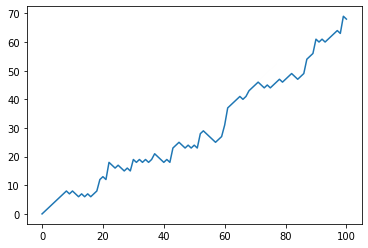

In [24]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Plot random_walk
plt.plot(random_walk)

# Show the plot
plt.show()

#### Simulate multiple walks
A single random walk is one thing, but that doesn't tell you if you have a good chance at winning the bet.

To get an idea about how big your chances are of reaching 60 steps, you can repeatedly simulate the random walk and collect the results. That's exactly what you'll do in this exercise.

In [25]:
# Numpy is imported; seed is set

# Initialize all_walks (don't change this line)
all_walks = []

# Simulate random walk 10 times
for i in range(10) :

    # Code from before
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        random_walk.append(step)

    # Append random_walk to all_walks
    all_walks.append(random_walk)

# Print all_walks
print(all_walks)

[[0, 1, 0, 0, 1, 5, 6, 7, 8, 9, 8, 7, 6, 5, 4, 5, 6, 7, 8, 9, 10, 9, 10, 11, 10, 11, 12, 15, 14, 15, 14, 15, 18, 19, 20, 21, 20, 19, 22, 23, 24, 25, 24, 23, 24, 27, 28, 33, 34, 33, 34, 33, 34, 33, 39, 38, 37, 38, 40, 39, 38, 37, 38, 39, 40, 41, 45, 50, 51, 52, 53, 56, 57, 58, 59, 60, 61, 62, 61, 60, 61, 62, 61, 67, 66, 67, 68, 67, 66, 67, 66, 65, 71, 70, 69, 70, 71, 70, 69, 68, 67], [0, 1, 7, 8, 11, 12, 18, 19, 20, 26, 25, 31, 30, 31, 32, 33, 32, 38, 39, 38, 39, 38, 39, 38, 39, 38, 39, 43, 44, 46, 45, 46, 45, 44, 45, 44, 45, 44, 48, 52, 51, 50, 49, 50, 51, 55, 56, 57, 61, 60, 59, 58, 59, 60, 62, 61, 60, 61, 62, 64, 67, 72, 73, 72, 73, 74, 75, 76, 77, 76, 77, 78, 84, 83, 88, 87, 91, 90, 94, 93, 96, 97, 96, 97, 103, 102, 101, 100, 104, 103, 102, 103, 104, 103, 104, 105, 106, 107, 106, 105, 104], [0, 1, 0, 0, 4, 5, 7, 11, 17, 16, 15, 16, 17, 18, 17, 18, 17, 18, 19, 18, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 33, 32, 35, 36, 35, 34, 35, 36, 37, 36, 35, 34, 33, 34, 35, 36, 37, 38, 39, 4

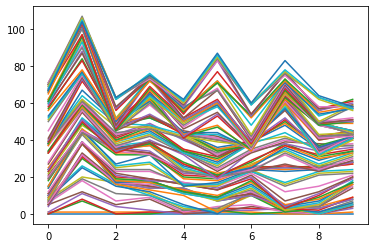

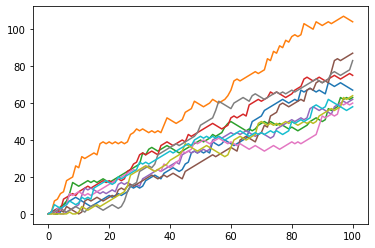

In [27]:
# numpy and matplotlib imported, seed set.

# Convert all_walks to Numpy array: np_aw
np_aw = np.array(all_walks)

# Plot np_aw and show
plt.plot(np_aw)
plt.show()

# Clear the figure
plt.clf()

# Transpose np_aw: np_aw_t
np_aw_t = np.transpose(np_aw)

# Plot np_aw_t and show
plt.plot(np_aw_t)
plt.show()

You can clearly see how the different simulations of the random walk went. Transposing the 2D Numpy array was crucial; otherwise Python misunderstood.

#### Implement clumsiness

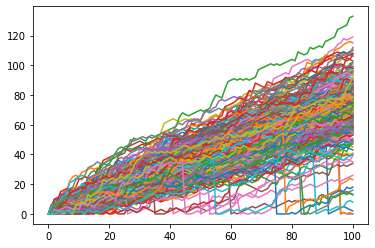

In [28]:
# numpy and matplotlib imported, seed set

# Simulate random walk 250 times
all_walks = []
for i in range(250) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)

        # Implement clumsiness
        if np.random.rand() <= 0.001 :
            step = 0

        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))
plt.plot(np_aw_t)
plt.show()

#### Plot the distribution

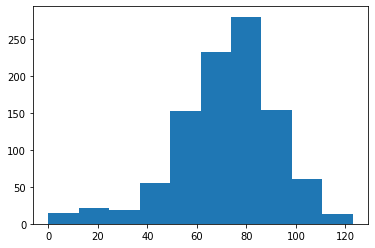

In [30]:
# numpy and matplotlib imported, seed set

# Simulate random walk 500 times
all_walks = []
for i in range(1000) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        if np.random.rand() <= 0.001 :
            step = 0
        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))

# Select last row from np_aw_t: ends
ends = np_aw_t[-1]

# Plot histogram of ends, display plot
plt.hist(ends)
plt.show()

#### Calculate the odds
The histogram of the previous exercise was created from a Numpy array ends, that contains 500 integers. Each integer represents the end point of a random walk. To calculate the chance that this end point is greater than or equal to 60, you can count the number of integers in ends that are greater than or equal to 60 and divide that number by 500, the total number of simulations.

In [31]:
len(ends[ends > 60])/1000

0.761

There is 76% chance that you could reach atleast 60 steps in Empires building if you toss a coin 100000 times.